In [1]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d alifrahman/chestxraydataset

 98% 1.12G/1.14G [00:14<00:00, 26.2MB/s]
100% 1.14G/1.14G [00:14<00:00, 84.8MB/s]


In [ ]:
! unzip chestxraydataset.zip

In [7]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

In [10]:

batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 624 files belonging to 2 classes.
Using 124 files for validation.


In [11]:
class_names = train_ds.class_names

In [12]:
class_names

['NORMAL', 'PNEUMONIA']

In [13]:

train_ds = train_ds.cache().shuffle(1000)
val_ds = val_ds.cache()


num_classes = len(class_names) # 5


In [19]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [24]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 10)       

In [27]:
print("Model Training....")

epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Training Complete!")

Model Training....
Epoch 1/5
131/131 [==============================] - 4s 14ms/step - loss: 0.5564 - accuracy: 0.7479 - val_loss: 0.5335 - val_accuracy: 0.6935
Epoch 2/5
131/131 [==============================] - 2s 12ms/step - loss: 0.2419 - accuracy: 0.8962 - val_loss: 0.5706 - val_accuracy: 0.7661
Epoch 3/5
131/131 [==============================] - 2s 12ms/step - loss: 0.1549 - accuracy: 0.9382 - val_loss: 0.5023 - val_accuracy: 0.7581
Epoch 4/5
131/131 [==============================] - 2s 13ms/step - loss: 0.1328 - accuracy: 0.9504 - val_loss: 1.1159 - val_accuracy: 0.7339
Epoch 5/5
131/131 [==============================] - 2s 14ms/step - loss: 0.1183 - accuracy: 0.9521 - val_loss: 0.5867 - val_accuracy: 0.7661
Training Complete!


In [28]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

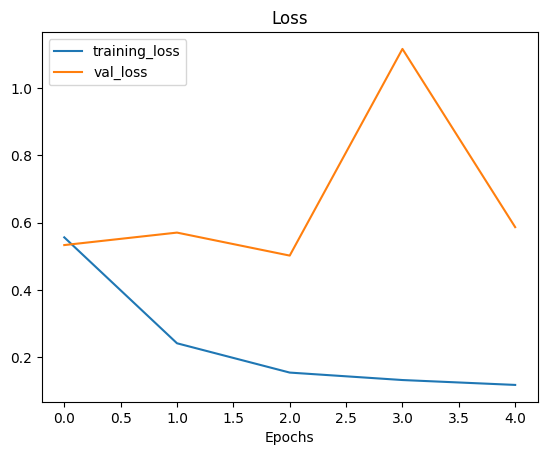

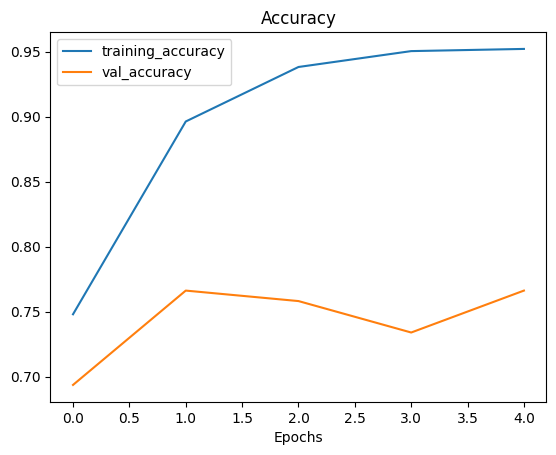

In [32]:
plot_loss_curves(history)

In [30]:
save_model(model, 'Chest_Xray_model_trained.hdf5')
print("Model Saved")

Model Saved
